# Sierpiński and other Kronecker Graphs

Kronecker products can be used iteratively to build scale-free fractal graph expansions with very interesting properties.  See [this paper](https://cs.stanford.edu/people/jure/pubs/kronecker-jmlr10.pdf) for a deep mathematical exploration of the subject.

In [1]:
from pygraphblas import *
from pygraphblas.gviz import *

import random
random.seed(42)

# Initiator Graph

Start with a small "initiator" graph matrix with random weights:

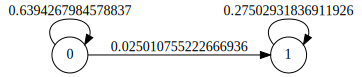

In [2]:
def k(f=random.random):
    N = Matrix.sparse(FP64, 2, 2)
    for e in ([0,0],[0,1],[1,1]):
        N[e] = f()
    return N

draw_graph(k())

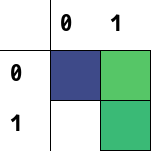

In [3]:
draw_matrix(k(), scale=50, labels=True, cmap='viridis')

## Kronecker Power

A "Kronecker power" can be acheived by iteratively multiply the intiator with itself using a [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product).

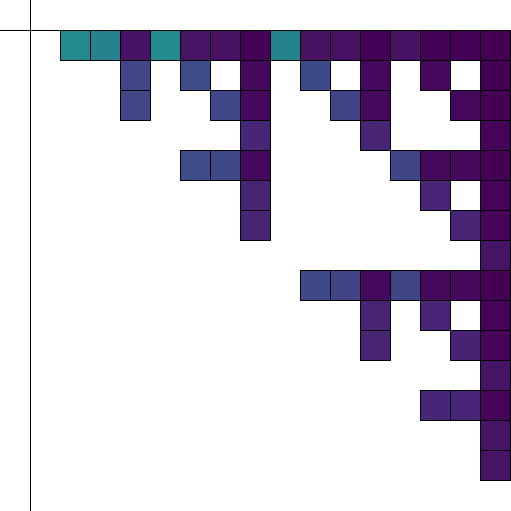

In [4]:
        
@binary_op(FP64)  
def randomize(x, y): 
    return x + x * random.uniform(0.9, y)

def sierpinski(K, n):
    for i in range(n):
        K = K.kronecker(K)
        K.apply_second(randomize, 1, out=K)
    return K

K2 = sierpinski(k(), 2).triu(1) # remove self edges

draw_matrix(K2, scale=30)

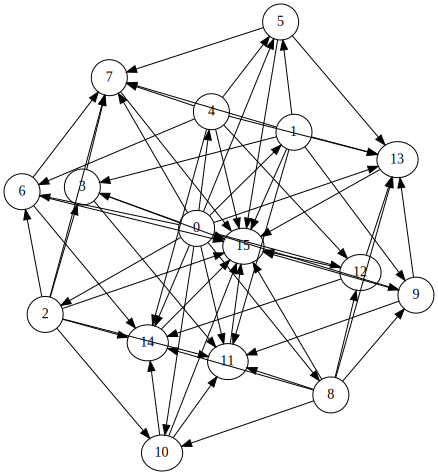

In [5]:
draw_graph(K2, show_weight=False, graph_attr=dict(nodesep='0.1', layout='neato'))

## Thresholding

By using `select()` only edges that meet a threshold are kept:

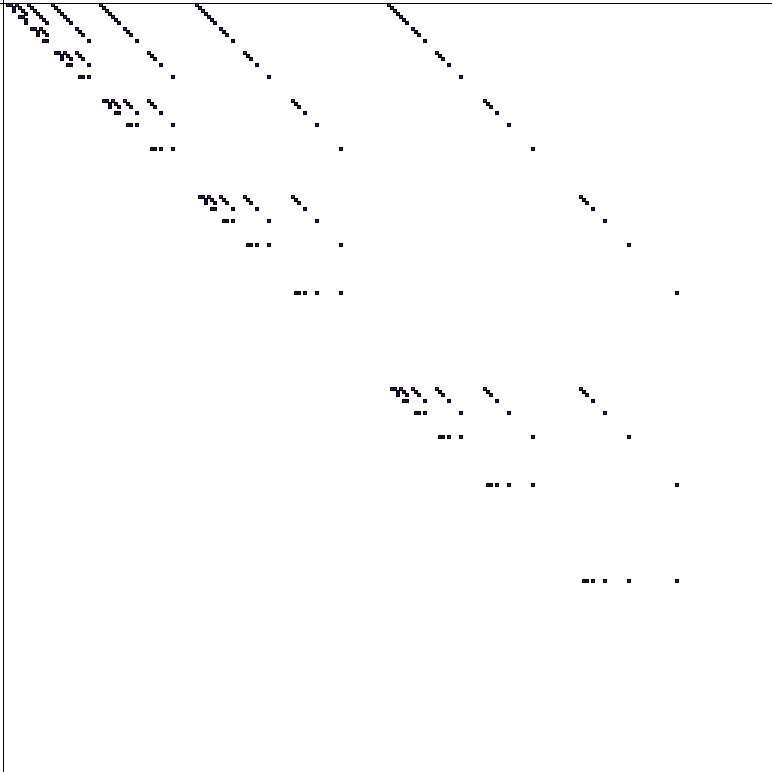

In [6]:
random.seed(42)
K3 = sierpinski(k(), 3).triu(1).select('>=', 0.02)

draw_matrix(K3, scale=3)

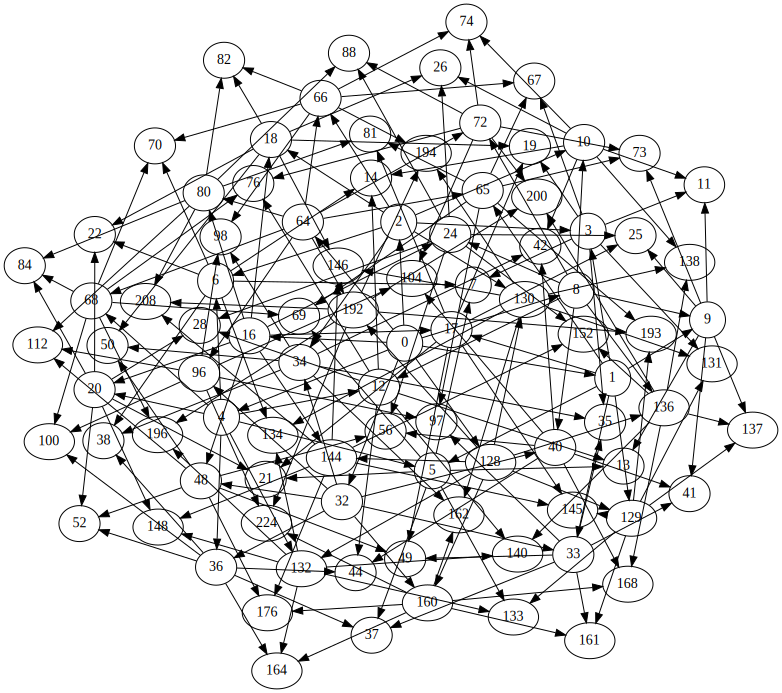

In [7]:
draw_graph(K3.pattern(), show_weight=False, graph_attr=dict(layout="neato"))

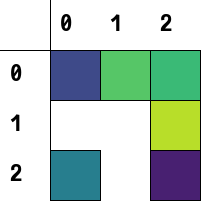

In [8]:
def j(f=random.random):
    N = Matrix.sparse(FP64, 3, 3)
    N[0,0] = f()
    N[0,1] = f()
    N[0,2] = f()
    N[1,2] = f()
    N[2,2] = f()
    N[2,0] = f()
    return N

draw_matrix(j(), scale=50, labels=True)

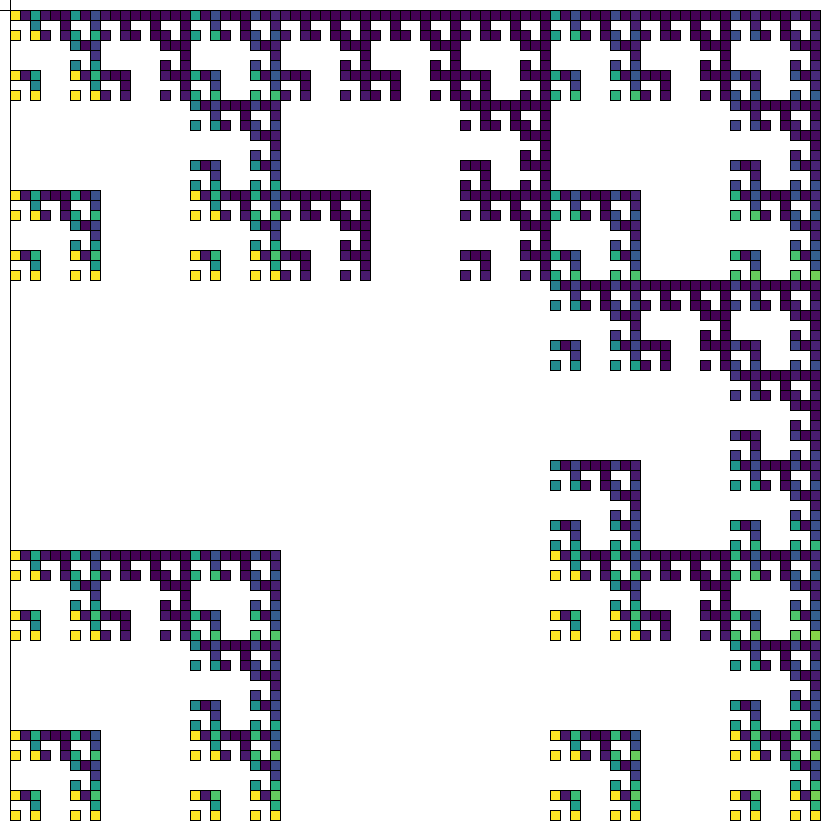

In [9]:
random.seed(42)
K4 = sierpinski(j(), 2)
draw_matrix(K4, scale=10)

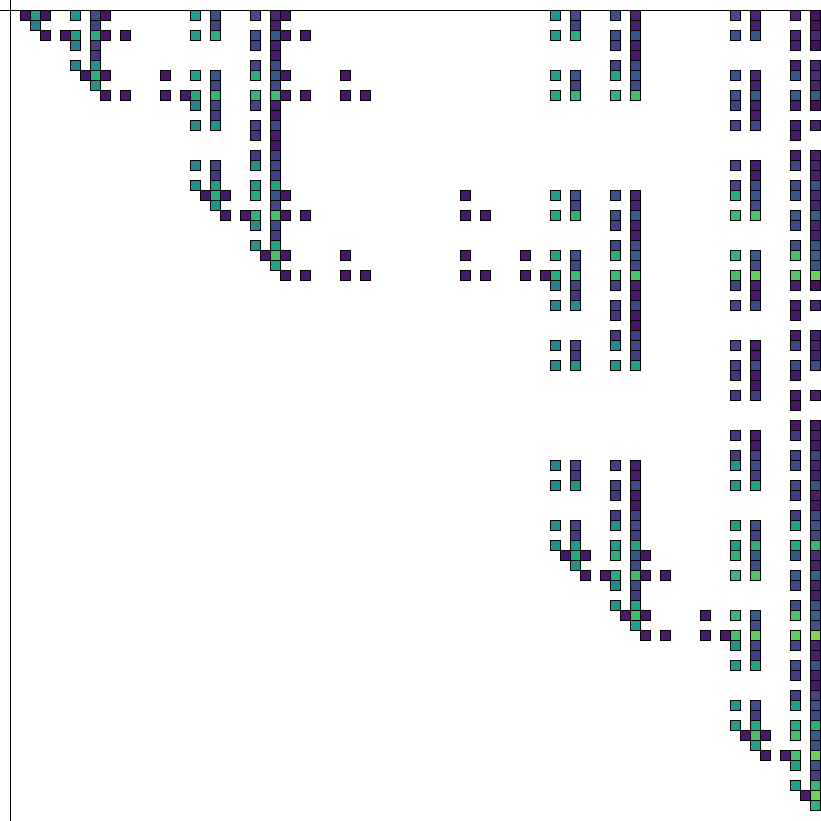

In [10]:
K5 = K4.select('>=', 0.03).triu(1)
draw_matrix(K5, scale=10)

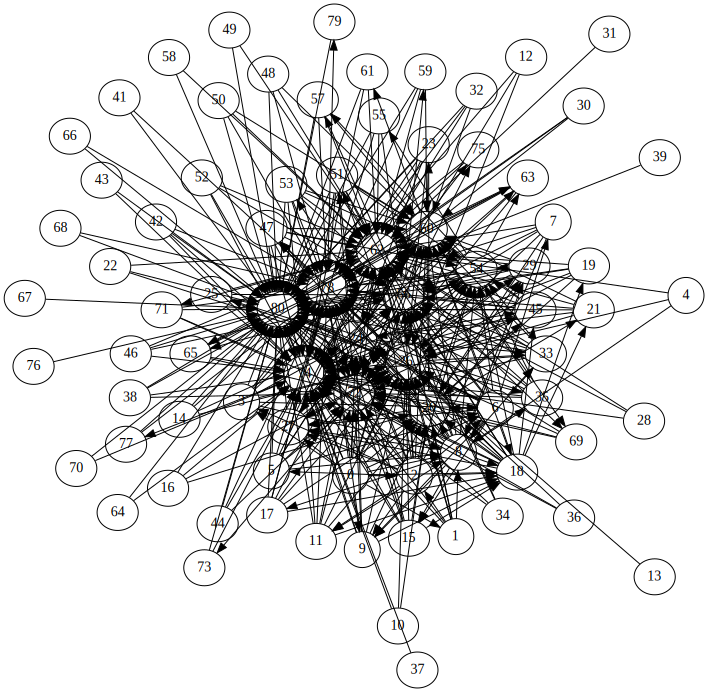

In [11]:
draw_graph(K5.pattern(), show_weight=False, graph_attr=dict(layout='neato'))